In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv("C:/Users/sanj/OneDrive/Documents/lr/sentiment_tweets3.csv")

In [4]:
df.head()

,Index,message to examine,label (depression result)
0,106,just had a real good moment. i missssssssss hi...,0
1,217,is reading manga http://plurk.com/p/mzp1e,0
2,220,@comeagainjen http://twitpic.com/2y2lx - http:...,0
3,288,@lapcat Need to send 'em to my accountant tomo...,0
4,540,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10314 entries, 0 to 10313
Data columns (total 3 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Index                      10314 non-null  int64 
 1   message to examine         10314 non-null  object
 2   label (depression result)  10314 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 241.9+ KB


In [6]:
print(f'Missing values in dataframe:\n{df.isnull().sum()}')

Missing values in dataframe:
Index                        0
message to examine           0
label (depression result)    0
dtype: int64


In [7]:
df['label (depression result)'].value_counts()

label (depression result)
0    8000
1    2314
Name: count, dtype: int64

<Axes: xlabel='label (depression result)'>

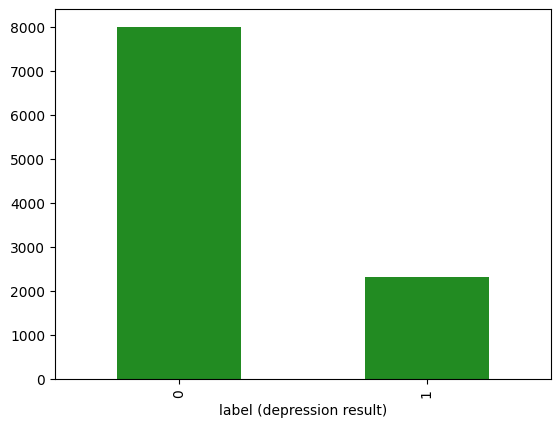

In [8]:
df['label (depression result)'].value_counts().plot(kind='bar',color='forestgreen')

In [9]:
!pip install nltk

In [10]:
!pip install wordcloud

In [12]:
# Plotting wordclouds for both negative and positive tweets
stopwords = set(STOPWORDS)

# Removing 'user' word as it does not hold any importance in our context
stopwords.add('user')        

depression_tweets = df['message to examine'][df['label (depression result)']==1].to_string()
wordcloud_depression = WordCloud(width = 1600, height = 1600,background_color ='white', stopwords = stopwords, min_font_size = 10).generate(depression_tweets)

Text(0.5, 1.0, 'depression_tweets')

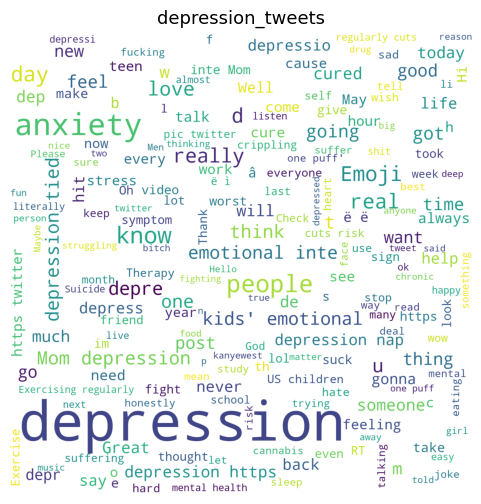

In [13]:
plt.figure(figsize=(15, 6), facecolor = None)
plt.imshow(wordcloud_depression)
plt.axis("off")
plt.title('depression_tweets', fontdict={'fontsize': 13})

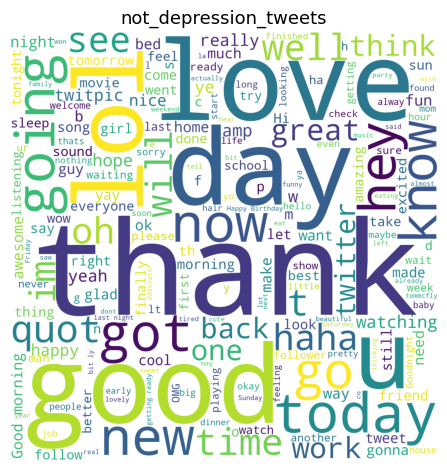

In [14]:
not_depression_tweets = df['message to examine'][df['label (depression result)']==0].to_string()
wordcloud_not_depression = WordCloud(width = 1600, height = 1600, background_color ='white', stopwords = stopwords, min_font_size = 10).generate(not_depression_tweets)
plt.imshow(wordcloud_not_depression)
plt.axis("off")
plt.title('not_depression_tweets', fontdict={'fontsize': 13})
plt.tight_layout() 
plt.show()

In [15]:
chatwords_path = "C:/Users/sanj/OneDrive/Documents/Chatwords.txt"
chatwords_df = pd.read_csv(chatwords_path, sep='=', names=['Original_Word', 'New_Word'])

In [16]:
chatwords_df

,Original_Word,New_Word
0,AFAIK,As Far As I Know
1,AFK,Away From Keyboard
2,ASAP,As Soon As Possible
3,ATK,At The Keyboard
4,ATM,At The Moment
...,...,...
85,BSAAW,Big smile and a wink
86,BWL,Bursting with laughter
87,LMAO,Laughing my a** off
88,BFF,Best friends forever


In [17]:
def replace_words(text, mapping_df):
    for index, row in mapping_df.iterrows():
        text = text.replace(row['Original_Word'].upper(), row['New_Word'].upper())
    return text

# Apply replacement to the DataFrame
df['message to examine'] = df['message to examine'].apply(lambda x: replace_words(x, chatwords_df))


In [18]:
df['message_cleaned']=df['message to examine'].str.lower()
df.head()

,Index,message to examine,label (depression result),message_cleaned
0,106,just had a real good moment. i missssssssss hi...,0,just had a real good moment. i missssssssss hi...
1,217,is reading manga http://plurk.com/p/mzp1e,0,is reading manga http://plurk.com/p/mzp1e
2,220,@comeagainjen http://twitpic.com/2y2lx - http:...,0,@comeagainjen http://twitpic.com/2y2lx - http:...
3,288,@lapcat Need to send 'em to my accountant tomo...,0,@lapcat need to send 'em to my accountant tomo...
4,540,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0,add me on myspace!!! myspace.com/lookthunder


In [19]:
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sanj\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [20]:
stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [21]:
def remove_stopwords(text):
    words = [word.lower() for word in text.split() if word.lower() not in stop_words]
    return " ".join(words)

In [22]:
df['message_cleaned'] = df['message_cleaned'].apply(remove_stopwords)
df.head()

,Index,message to examine,label (depression result),message_cleaned
0,106,just had a real good moment. i missssssssss hi...,0,"real good moment. missssssssss much,"
1,217,is reading manga http://plurk.com/p/mzp1e,0,reading manga http://plurk.com/p/mzp1e
2,220,@comeagainjen http://twitpic.com/2y2lx - http:...,0,@comeagainjen http://twitpic.com/2y2lx - http:...
3,288,@lapcat Need to send 'em to my accountant tomo...,0,@lapcat need send 'em accountant tomorrow. odd...
4,540,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0,add myspace!!! myspace.com/lookthunder


In [23]:
def remove_htmltag(text):
    pattern=re.compile("<.*?>")
    return pattern.sub(r'',text)
df['message_cleaned'] = df['message_cleaned'].apply(remove_htmltag)

In [24]:
df.head()

,Index,message to examine,label (depression result),message_cleaned
0,106,just had a real good moment. i missssssssss hi...,0,"real good moment. missssssssss much,"
1,217,is reading manga http://plurk.com/p/mzp1e,0,reading manga http://plurk.com/p/mzp1e
2,220,@comeagainjen http://twitpic.com/2y2lx - http:...,0,@comeagainjen http://twitpic.com/2y2lx - http:...
3,288,@lapcat Need to send 'em to my accountant tomo...,0,@lapcat need send 'em accountant tomorrow. odd...
4,540,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0,add myspace!!! myspace.com/lookthunder


In [25]:
def remove_url(text):
    text=re.sub(r"((https:|http|ftp)?(:\/\/)?(www\.)?)?[-a-zA-Z0-9@:%._\+~#=]{1,256}\.[a-zA-Z0-9()]{1,6}\b([-a-zA-Z0-9()@:%_\+.~#?&\/\/=]*)",' ',text)
    return re.sub(r'/', ' / ', text)
df['message_cleaned'] = df['message_cleaned'].apply(remove_url)

In [26]:
df.head()

,Index,message to examine,label (depression result),message_cleaned
0,106,just had a real good moment. i missssssssss hi...,0,"real good moment. missssssssss much,"
1,217,is reading manga http://plurk.com/p/mzp1e,0,reading manga
2,220,@comeagainjen http://twitpic.com/2y2lx - http:...,0,@comeagainjen -
3,288,@lapcat Need to send 'em to my accountant tomo...,0,@lapcat need send 'em accountant tomorrow. odd...
4,540,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0,add myspace!!!


In [27]:
!pip install emoji

In [28]:
import emoji
emoji.demojize( df['message_cleaned'])

'real good moment. missssssssss much,reading manga  @comeagainjen   -  @lapcat need send \'em accountant tomorrow. oddly, even referring taxes. supporting evidence, though.add myspace!!!  sleepy. good times tonight though@silkcharm re: #nbn someone already said, fiber home mean least regular23 24ï¿½c possible today. nicenite twitterville workout -ciao@dananner night, darlin\'! sweet dreamsgood morning everybody!finally! created wordpress blog. there\'s already blog seattle coffee community ...  kisha cnt get u til get frm u remember ur top@nicolerichie yes remember band, awesome, please replyreally love reflections shadows@blueaero ooo fantasy? like fantasy novels check@rokchic28 probs, sell nothing blog   i\'ll get listen band, itunes?@shipovalov &quot;nokla connecting people&quot; ?? ??????? ???????stayed late start early good thing like job@kal_penn read new job, congratyoulations! that\'s fantastic.able sleep all. think i\'ll watch yougly betty online.woo thanks ron steeve followin

In [29]:
df.head()

,Index,message to examine,label (depression result),message_cleaned
0,106,just had a real good moment. i missssssssss hi...,0,"real good moment. missssssssss much,"
1,217,is reading manga http://plurk.com/p/mzp1e,0,reading manga
2,220,@comeagainjen http://twitpic.com/2y2lx - http:...,0,@comeagainjen -
3,288,@lapcat Need to send 'em to my accountant tomo...,0,@lapcat need send 'em accountant tomorrow. odd...
4,540,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0,add myspace!!!


In [30]:
import string
def clean_punctuations(text):
    return text.translate(str.maketrans('', '', string.punctuation))
df['message_cleaned']= df['message_cleaned'].apply(lambda x: clean_punctuations(x))
df.head()

,Index,message to examine,label (depression result),message_cleaned
0,106,just had a real good moment. i missssssssss hi...,0,real good moment missssssssss much
1,217,is reading manga http://plurk.com/p/mzp1e,0,reading manga
2,220,@comeagainjen http://twitpic.com/2y2lx - http:...,0,comeagainjen
3,288,@lapcat Need to send 'em to my accountant tomo...,0,lapcat need send em accountant tomorrow oddly ...
4,540,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0,add myspace


In [31]:
#repeating_char
def clean_repeating_char(text):
    return re.sub(r"(.)\1\1+", r"\1\1", text)
df['message_cleaned'] = df['message_cleaned'].apply(lambda x: clean_repeating_char(x))
df.head()

,Index,message to examine,label (depression result),message_cleaned
0,106,just had a real good moment. i missssssssss hi...,0,real good moment miss much
1,217,is reading manga http://plurk.com/p/mzp1e,0,reading manga
2,220,@comeagainjen http://twitpic.com/2y2lx - http:...,0,comeagainjen
3,288,@lapcat Need to send 'em to my accountant tomo...,0,lapcat need send em accountant tomorrow oddly ...
4,540,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0,add myspace


In [32]:
def clean_numbers(data):
    return re.sub('[0-9]+', '', data)
df['message_cleaned'] = df['message_cleaned'].apply(lambda x: clean_numbers(x))
df.head()

,Index,message to examine,label (depression result),message_cleaned
0,106,just had a real good moment. i missssssssss hi...,0,real good moment miss much
1,217,is reading manga http://plurk.com/p/mzp1e,0,reading manga
2,220,@comeagainjen http://twitpic.com/2y2lx - http:...,0,comeagainjen
3,288,@lapcat Need to send 'em to my accountant tomo...,0,lapcat need send em accountant tomorrow oddly ...
4,540,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0,add myspace


In [33]:
def remove_hashtag(data):
    return re.sub('#[\w\d]+',' ' ,data)
df['message_cleaned'] = df['message_cleaned'].apply(lambda x: remove_hashtag(x))
df.head()

,Index,message to examine,label (depression result),message_cleaned
0,106,just had a real good moment. i missssssssss hi...,0,real good moment miss much
1,217,is reading manga http://plurk.com/p/mzp1e,0,reading manga
2,220,@comeagainjen http://twitpic.com/2y2lx - http:...,0,comeagainjen
3,288,@lapcat Need to send 'em to my accountant tomo...,0,lapcat need send em accountant tomorrow oddly ...
4,540,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0,add myspace


In [34]:
def clean_username(data):
    return re.sub('@[^\s]+',' ', data)
df['message_cleaned'] = df['message_cleaned'].apply(lambda x: clean_username(x))
df.head()

,Index,message to examine,label (depression result),message_cleaned
0,106,just had a real good moment. i missssssssss hi...,0,real good moment miss much
1,217,is reading manga http://plurk.com/p/mzp1e,0,reading manga
2,220,@comeagainjen http://twitpic.com/2y2lx - http:...,0,comeagainjen
3,288,@lapcat Need to send 'em to my accountant tomo...,0,lapcat need send em accountant tomorrow oddly ...
4,540,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0,add myspace


In [35]:
def remove_images(tweet):
    cleaned_tweet = re.sub(r"pic\.twitter\.com/\S+",'', tweet)
    cleaned_tweet = re.sub("\w+(\.png|\.jpg|\.gif|\.jpeg)", " ", cleaned_tweet)
    return cleaned_tweet

df["message_cleaned"] = df["message_cleaned"].apply(remove_images)
df.head(10)

,Index,message to examine,label (depression result),message_cleaned
0,106,just had a real good moment. i missssssssss hi...,0,real good moment miss much
1,217,is reading manga http://plurk.com/p/mzp1e,0,reading manga
2,220,@comeagainjen http://twitpic.com/2y2lx - http:...,0,comeagainjen
3,288,@lapcat Need to send 'em to my accountant tomo...,0,lapcat need send em accountant tomorrow oddly ...
4,540,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0,add myspace
5,624,so sleepy. good times tonight though,0,sleepy good times tonight though
6,701,"@SilkCharm re: #nbn as someone already said, d...",0,silkcharm re nbn someone already said fiber ho...
7,808,23 or 24ï¿½C possible today. Nice,0,ï¿½c possible today nice
8,1193,nite twitterville workout in the am -ciao,0,nite twitterville workout ciao
9,1324,"@daNanner Night, darlin'! Sweet dreams to you",0,dananner night darlin sweet dreams


In [36]:
def remove_fractions(text):
    itemName = re.sub(r"[\u00BC-\u00BE\u2150-\u215E\u2189]+"," ",text)
    return itemName
df["message_cleaned"] = df["message_cleaned"].apply(remove_fractions)
df.head(10)

,Index,message to examine,label (depression result),message_cleaned
0,106,just had a real good moment. i missssssssss hi...,0,real good moment miss much
1,217,is reading manga http://plurk.com/p/mzp1e,0,reading manga
2,220,@comeagainjen http://twitpic.com/2y2lx - http:...,0,comeagainjen
3,288,@lapcat Need to send 'em to my accountant tomo...,0,lapcat need send em accountant tomorrow oddly ...
4,540,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0,add myspace
5,624,so sleepy. good times tonight though,0,sleepy good times tonight though
6,701,"@SilkCharm re: #nbn as someone already said, d...",0,silkcharm re nbn someone already said fiber ho...
7,808,23 or 24ï¿½C possible today. Nice,0,ï¿ c possible today nice
8,1193,nite twitterville workout in the am -ciao,0,nite twitterville workout ciao
9,1324,"@daNanner Night, darlin'! Sweet dreams to you",0,dananner night darlin sweet dreams


In [37]:
def clean_tweets(tweet):
    pattern = r'[^\x00-\x7F\u0020-\u007E]'  # Matches any non-ASCII characters excluding space
    cleaned_tweet = tweet.str.replace(pattern, '', regex=True)
    return cleaned_tweet
df['message_cleaned'] = clean_tweets(df['message_cleaned'])
df.head(10)

,Index,message to examine,label (depression result),message_cleaned
0,106,just had a real good moment. i missssssssss hi...,0,real good moment miss much
1,217,is reading manga http://plurk.com/p/mzp1e,0,reading manga
2,220,@comeagainjen http://twitpic.com/2y2lx - http:...,0,comeagainjen
3,288,@lapcat Need to send 'em to my accountant tomo...,0,lapcat need send em accountant tomorrow oddly ...
4,540,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0,add myspace
5,624,so sleepy. good times tonight though,0,sleepy good times tonight though
6,701,"@SilkCharm re: #nbn as someone already said, d...",0,silkcharm re nbn someone already said fiber ho...
7,808,23 or 24ï¿½C possible today. Nice,0,c possible today nice
8,1193,nite twitterville workout in the am -ciao,0,nite twitterville workout ciao
9,1324,"@daNanner Night, darlin'! Sweet dreams to you",0,dananner night darlin sweet dreams


In [38]:
!pip install language_tool_python

In [39]:
import language_tool_python
#from spellchecker import SpellChecker
import nltk
from nltk.tokenize import word_tokenize

# Initialize the spell checker
#spell = SpellChecker()
tool = language_tool_python.LanguageTool('en-US')

In [40]:
df['corrected_tweets'] = df.apply(lambda l: tool.correct(l['message_cleaned']), axis=1)

In [41]:
df.head()

,Index,message to examine,label (depression result),message_cleaned,corrected_tweets
0,106,just had a real good moment. i missssssssss hi...,0,real good moment miss much,Real good moment miss much
1,217,is reading manga http://plurk.com/p/mzp1e,0,reading manga,Reading manga
2,220,@comeagainjen http://twitpic.com/2y2lx - http:...,0,comeagainjen,Comeagainjen
3,288,@lapcat Need to send 'em to my accountant tomo...,0,lapcat need send em accountant tomorrow oddly ...,Lapcat need to send me accountant tomorrow odd...
4,540,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0,add myspace,Add MySpace


In [42]:
df.isnull().sum()

Index                        0
message to examine           0
label (depression result)    0
message_cleaned              0
corrected_tweets             0
dtype: int64

In [43]:
df.shape

(10314, 5)

In [44]:
from nltk.stem import PorterStemmer        
from nltk.tokenize import TweetTokenizer

In [45]:
nltk.download('punkt')
nltk.download('wordnet')
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem import PorterStemmer

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sanj\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\sanj\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [46]:
lemmatizer = nltk.stem.wordnet.WordNetLemmatizer()

def lemmatizeRows(text):
    return " ".join([lemmatizer.lemmatize(word) for word in text.split()])

df['lemmatizedRows'] = df['corrected_tweets'].apply(lemmatizeRows)

df.head()

,Index,message to examine,label (depression result),message_cleaned,corrected_tweets,lemmatizedRows
0,106,just had a real good moment. i missssssssss hi...,0,real good moment miss much,Real good moment miss much,Real good moment miss much
1,217,is reading manga http://plurk.com/p/mzp1e,0,reading manga,Reading manga,Reading manga
2,220,@comeagainjen http://twitpic.com/2y2lx - http:...,0,comeagainjen,Comeagainjen,Comeagainjen
3,288,@lapcat Need to send 'em to my accountant tomo...,0,lapcat need send em accountant tomorrow oddly ...,Lapcat need to send me accountant tomorrow odd...,Lapcat need to send me accountant tomorrow odd...
4,540,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0,add myspace,Add MySpace,Add MySpace


In [47]:
stemmer = PorterStemmer()

def stemRows(text):
    return " ".join([stemmer.stem(word) for word in text.split()])

df['stemmedRows'] = df['lemmatizedRows'].apply(stemRows)

df.head()

,Index,message to examine,label (depression result),message_cleaned,corrected_tweets,lemmatizedRows,stemmedRows
0,106,just had a real good moment. i missssssssss hi...,0,real good moment miss much,Real good moment miss much,Real good moment miss much,real good moment miss much
1,217,is reading manga http://plurk.com/p/mzp1e,0,reading manga,Reading manga,Reading manga,read manga
2,220,@comeagainjen http://twitpic.com/2y2lx - http:...,0,comeagainjen,Comeagainjen,Comeagainjen,comeagainjen
3,288,@lapcat Need to send 'em to my accountant tomo...,0,lapcat need send em accountant tomorrow oddly ...,Lapcat need to send me accountant tomorrow odd...,Lapcat need to send me accountant tomorrow odd...,lapcat need to send me account tomorrow oddli ...
4,540,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0,add myspace,Add MySpace,Add MySpace,add myspac


In [48]:
df['label (depression result)'].value_counts()

label (depression result)
0    8000
1    2314
Name: count, dtype: int64

In [49]:
df1=df.iloc[:,1:5].copy()

In [50]:
df1.head()

,message to examine,label (depression result),message_cleaned,corrected_tweets
0,just had a real good moment. i missssssssss hi...,0,real good moment miss much,Real good moment miss much
1,is reading manga http://plurk.com/p/mzp1e,0,reading manga,Reading manga
2,@comeagainjen http://twitpic.com/2y2lx - http:...,0,comeagainjen,Comeagainjen
3,@lapcat Need to send 'em to my accountant tomo...,0,lapcat need send em accountant tomorrow oddly ...,Lapcat need to send me accountant tomorrow odd...
4,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0,add myspace,Add MySpace


In [51]:
from sklearn.feature_extraction.text import TfidfVectorizer
cv = TfidfVectorizer()
tfidf = cv.fit_transform(df1['corrected_tweets'])

In [52]:
from sklearn.model_selection import train_test_split
tfX_train, tfX_test, tfy_train, tfy_test = train_test_split(tfidf, df1['label (depression result)'], test_size = 0.2)
tfX_train

<8251x17881 sparse matrix of type '<class 'numpy.float64'>'
	with 71023 stored elements in Compressed Sparse Row format>

In [53]:
tfX_train.shape

(8251, 17881)

In [54]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb.fit(tfX_train, tfy_train)

MultinomialNB()

In [55]:
from sklearn.metrics import confusion_matrix, accuracy_score

y_pred_mnb = mnb.predict(tfX_test)

print(f'Accuracy score is : {accuracy_score(tfy_test, y_pred_mnb)}')

Accuracy score is : 0.8977217644207465


In [56]:
cf = confusion_matrix(tfy_test, y_pred_mnb, labels = [1,0])
cf

array([[ 250,  209],
       [   2, 1602]], dtype=int64)

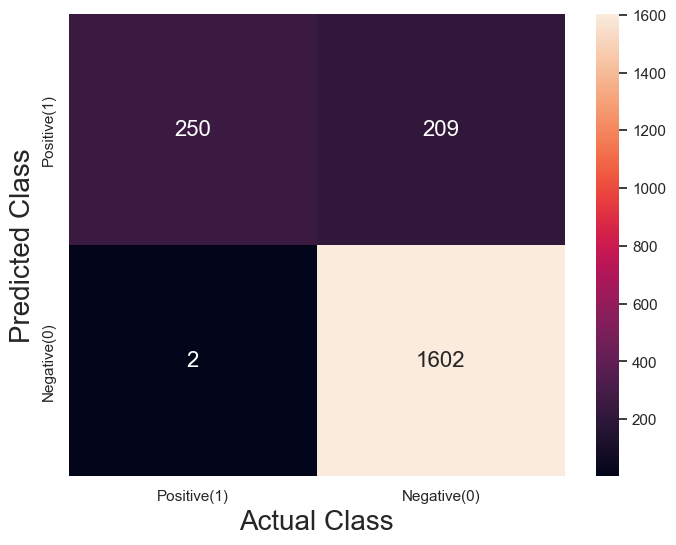

In [57]:
x_axis_labels = ["Positive(1)","Negative(0)"]
y_axis_labels = ["Positive(1)","Negative(0)"]

plt.figure(figsize = (8,6))
sns.set(font_scale=1)
sns.heatmap(cf, xticklabels = x_axis_labels, yticklabels = y_axis_labels, annot = True, fmt='g',annot_kws = {'size': 16})
plt.xlabel("Actual Class", fontsize = 20)
plt.ylabel("Predicted Class", fontsize = 20)
plt.show()

In [58]:
!pip install tensorflow_hub

In [59]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
import tensorflow_hub as hub

In [60]:
embed = hub.load("https://www.kaggle.com/models/google/wiki-words/frameworks/TensorFlow2/variations/250/versions/1")

In [61]:
def get_max_length(df):
  ## get max token counts from train data,
  ## so we use this number as fixed length input to RNN cell

  max_length = 0
  for row in df['corrected_tweets']:
    if len(row.split(" ")) > max_length:
      max_length = len(row.split(" "))
  
  return max_length

In [62]:
get_max_length(df1)

75

In [63]:
def get_word2vec_enc(tweets):
  ## get word2vec value for each word in sentence
  # concatenate word in numpy array, so we can use it as RNN input

  encoded_tweets = []
  for tweet in tweets:
    tokens = tweet.split(" ")
    word2vec_embedding = embed(tokens)
    encoded_tweets.append(word2vec_embedding)
  return encoded_tweets

In [64]:
def get_padded_encoded_tweets(encoded_tweets):
  # for short sentences, we prepend zero padding so all input to RNN
  # has same length

  padded_tweets_encoding = []
  for enc_tweet in encoded_tweets:
    zero_padding_cnt = max_length - enc_tweet.shape[0]
    pad = np.zeros((1, 250))
    for i in range(zero_padding_cnt):
      enc_tweet = np.concatenate((pad, enc_tweet), axis = 0)
    padded_tweets_encoding.append(enc_tweet)
  return padded_tweets_encoding

In [65]:
def sentiment_encode(sentiment):
    if sentiment == 0:
        return [0,1]
    else:
        return [1,0]

In [66]:
def preprocess(df):
  # encode text value to numeric value

  tweets = df['corrected_tweets'].tolist()

  encoded_tweets = get_word2vec_enc(tweets)
  padded_encoded_tweets = get_padded_encoded_tweets(encoded_tweets)

  #encoded sentiment
  sentiments = df['label (depression result)'].tolist()
  encoded_sentiment = [sentiment_encode(sentiment) for sentiment in sentiments]

  X = np.array(padded_encoded_tweets)
  Y = np.array(encoded_sentiment)

  return X, Y

In [67]:
max_length = get_max_length(df1)
max_length

75

In [68]:
tdf = df1.sample(frac = 1)
train = tdf[:8000]
test = tdf[8000:]

In [69]:
train.shape, test.shape

((8000, 4), (2314, 4))

In [70]:
train_X, train_Y = preprocess(train)
test_X, test_Y = preprocess(test)

In [71]:
model = Sequential()
model.add(LSTM(32))
model.add(Dense(2, activation = 'softmax'))
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

In [72]:
model.fit(train_X, train_Y, epochs = 10)

Epoch 1/10
250/250 [==============================] - 7s 22ms/step - loss: 0.1726 - accuracy: 0.9344
Epoch 2/10
250/250 [==============================] - 6s 23ms/step - loss: 0.0209 - accuracy: 0.9962
Epoch 3/10
250/250 [==============================] - 6s 23ms/step - loss: 0.0229 - accuracy: 0.9952
Epoch 4/10
250/250 [==============================] - 5s 22ms/step - loss: 0.0140 - accuracy: 0.9973
Epoch 5/10
250/250 [==============================] - 6s 23ms/step - loss: 0.0135 - accuracy: 0.9970
Epoch 6/10
250/250 [==============================] - 6s 22ms/step - loss: 0.0110 - accuracy: 0.9977
Epoch 7/10
250/250 [==============================] - 5s 22ms/step - loss: 0.0110 - accuracy: 0.9976
Epoch 8/10
250/250 [==============================] - 6s 22ms/step - loss: 0.0115 - accuracy: 0.9971
Epoch 9/10
250/250 [==============================] - 6s 22ms/step - loss: 0.0098 - accuracy: 0.9976
Epoch 10/10
250/250 [==============================] - 5s 22ms/step - loss: 0.0096 - accura

In [73]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (32, 32)                  36224     
                                                                 
 dense (Dense)               (32, 2)                   66        
                                                                 
Total params: 36,290
Trainable params: 36,290
Non-trainable params: 0
_________________________________________________________________


In [74]:
score, acc = model.evaluate(test_X, test_Y, verbose = 2)
print("Test Score:", score)
print("Test Accuracy:", acc)

73/73 - 1s - loss: 0.0166 - accuracy: 0.9965 - 1s/epoch - 17ms/step
Test Score: 0.016638193279504776
Test Accuracy: 0.9965428113937378


In [75]:
y_pred = model.predict(test_X)

73/73 [==============================] - 1s 11ms/step


In [76]:
import sklearn.metrics as metrics
matrix = metrics.confusion_matrix(test_Y.argmax(axis = 1), y_pred.argmax(axis = 1), labels = [1,0])
matrix

array([[1774,    0],
       [   8,  532]], dtype=int64)

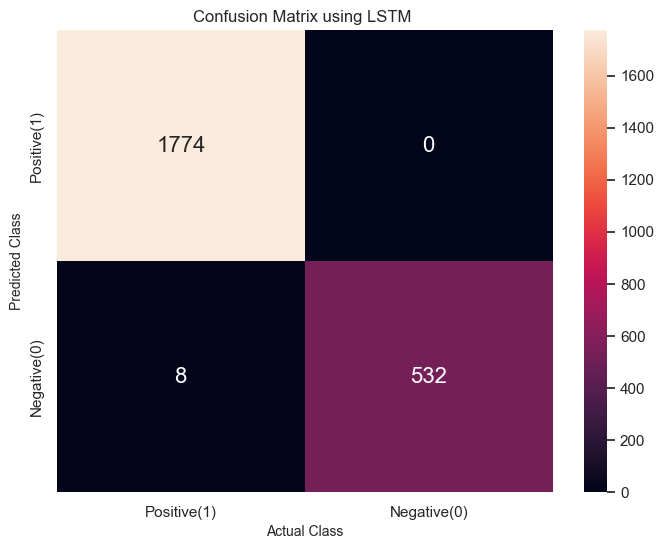

In [91]:
x_axis_labels = ["Positive(1)","Negative(0)"]
y_axis_labels = ["Positive(1)","Negative(0)"]

plt.figure(figsize = (8,6))
sns.set(font_scale=1)
sns.heatmap(matrix, xticklabels = x_axis_labels, yticklabels = y_axis_labels, annot = True, fmt='g',annot_kws = {'size': 16})
plt.xlabel("Actual Class", fontsize = 10)
plt.ylabel("Predicted Class", fontsize = 10)
plt.title("Confusion Matrix using LSTM ")
plt.show()